# >> DA 22 АД5 Проект 2 / Команда 1

Задача:

2019 год
Вы работаете аналитиками в крупной российской сети фастфуд-ресторанов, которая специализируется на блинах. Сейчас ваша компания планирует выйти на рынок США. Ваши коллеги подготовили список городов, которые приоритетны с точки зрения проверки рынка:

●	Columbus, Ohio; 

●	Cincinnati, Ohio; 

●	Cleveland, Ohio; 

●	Las Vegas, Nevada; 

●	Miami, Florida. 



Ваша задача: 
1.	Для каждого города из списка ответить, рекомендуете ли вы открывать там рестораны. 
2.	Если рекомендуете ― указать приоритетный порядок открытия, предполагаемое количество ресторанов и районы, в которых их нужно открывать. 
Вы будете презентовать свое решение потенциальным инвесторам из США 
на русском языке


## Загрузка данных

Импорт необходимых билиотек и подключение файла с данными

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
%matplotlib inline

In [13]:
df = pd.read_csv("./Datafiniti_Fast_Food_Restaurants_May19.csv")
df

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AWrSh_KgsVYjT2BJAzaH,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Accommodation & Food Services,Greeley,US,us/co/greeley/255511thavenue/554191587,40.396290,-104.696990,Carl's Jr.,80631,CO,https://www.yellowpages.com/greeley-co/mip/car...,https://www.carlsjr.com/?utm_source=Yextandutm...
1,AWEKlA-LIxWefVJwxG9B,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Resta...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/2513highway6and50/1550891556,39.081350,-108.586890,Del Taco,81505,CO,http://www.citysearch.com/profile/772076870/gr...,http://www.deltaco.com
2,AWrSfAcYsVYjT2BJAzPt,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restauran...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/1125pattersonroad/-2137447852,39.091480,-108.554110,Which Wich,81506,CO,https://www.yellowpages.com/grand-junction-co/...,http://www.whichwich.com
3,AWrSa3NAQTFama1Xpkbz,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Aurora,US,us/co/aurora/3455nsalidacourt/1143321601,39.763690,-104.776710,Chipotle Mexican Grill,80011,CO,https://www.yellowpages.com/aurora-co/mip/chip...,http://www.chipotle.com
4,AWrSaVGzZ4Yw-wtdgcaB,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Denver,US,us/co/denver/5225ecolfaxavenue/-864103396,39.740440,-104.926360,Taco Bell,80220,CO,https://www.yellowpages.com/denver-co/mip/taco...,https://locations.tacobell.com/co/denver/5225-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,AVwd7U0T_7pvs4fz-fS_,2016-05-31T13:33:45Z,2018-12-03T09:04:19Z,1803 Carolina Ave,"American Restaurants,Caterers,Soul Food Restau...",Accommodation & Food Services,Bessemer,US,us/al/bessemer/1803carolinaave/785498836,33.399574,-86.951050,Church's Chicken Of Birmingham,35020,AL,http://www.yellowpages.com/bessemer-al/mip/chu...,http://www.churchs.com
9996,AV1XW1fF3D1zeR_xFKHL,2017-07-18T20:19:50Z,2018-12-02T00:08:36Z,8511 Cantilever Way Ste 105,"Mexican Restaurants,Caterers,Delicatessens,Iri...",Accommodation & Food Services,Raleigh,US,us/nc/raleigh/8511cantileverwayste105/-1596320866,35.884500,-78.737541,Luxury Box,27613-6996,NC,https://www.bbb.org/us/nc/raleigh/profile/spor...,"http://www.theluxuryboxofraleigh.com,http://th..."
9997,AV5UVbkiRxPSIh2RiQxV,2017-09-05T23:05:50Z,2018-12-01T07:38:03Z,2601 Plover Rd,"Carry-out food,Hot dog restaurants,Fast Food R...",Accommodation & Food Services,Plover,US,us/wi/plover/2601ploverrd/-1161002137,44.453180,-89.543170,McDonald's,54467,WI,https://www.yellowpages.com/plover-wi/mip/mcdo...,"http://mcdonalds.com,http://www.mcdonalds.com/..."
9998,AVwc9BxYByjofQCxj_GW,2016-03-31T02:43:12Z,2018-12-01T07:35:22Z,170 E Main St,"Carry-out food,Caterers,Restaurant delivery se...",Accommodation & Food Services,Hendersonville,US,us/tn/hendersonville/170emainst/-66712705,36.308262,-86.607339,Pizza Hut,37075,TN,https://foursquare.com/v/pizza-hut/4c5fffd43a3...,http://www.pizzahut.com


In [14]:
cities = np.unique(df['city'])

In [15]:
df_ohio = df[df['province'] == 'OH']
df_ohio

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
167,AVwctTiBByjofQCxhTbO,2016-04-02T23:42:43Z,2019-05-19T00:50:15Z,3019 Woodman Dr,"Delis And Delicatessens,Restaurant,Carry-out f...",Accommodation & Food Services,Dayton,US,us/oh/dayton/3019woodmandr/-891525969,39.701900,-84.123400,Subway,45420,OH,https://www.allmenus.com/oh/dayton/134424-subw...,http://subway.com
197,AVwekpWg_7pvs4fzERqt,2016-04-03T11:58:15Z,2019-05-18T20:51:19Z,1201 W Main St,"Ice Cream and Frozen Desserts,New Lebanon Rest...",Accommodation & Food Services,New Lebanon,US,us/oh/newlebanon/1201wmainst/-1721138121,39.745900,-84.410100,Dairy Queen,45345,OH,https://foursquare.com/v/dairy-queen/4f44f5571...,http://www.dairyqueen.com
263,AVweVtoSByjofQCxxV_-,2016-04-04T03:21:58Z,2019-05-18T13:45:09Z,889 E National Rd,"Asian Restaurants,Restaurant,Chinese Restauran...",Accommodation & Food Services,Vandalia,US,us/oh/vandalia/889enationalrd/-1665266908,39.892600,-84.180900,Dragon China,45377,OH,https://www.yellowpages.com/vandalia-oh/mip/dr...,http://www.dragonchinaohio.com/
283,AVzA-jrOFcQ3k02bBagJ,2017-06-19T15:30:43Z,2019-05-18T12:34:28Z,8800 Kingsridge Dr,"Delis And Delicatessens,Restaurant,Carry-out f...",Accommodation & Food Services,Dayton,US,us/oh/dayton/8800kingsridgedr/-891525969,39.630500,-84.212400,SUBWAY,45458,OH,http://www.citysearch.com/profile/781976160/da...,http://www.subway.com
369,AVwciboYIN2L1WUfmDYw,2016-06-20T15:36:23Z,2019-05-18T07:12:36Z,1888 W Main St,"Carry-out food,Caterers,Restaurant delivery se...",Accommodation & Food Services,Troy,US,us/oh/troy/1888wmainst/-1947870258,40.055600,-84.240400,Jimmy John's,45373,OH,https://foursquare.com/v/jimmy-johns/4fc59389e...,"http://www.jimmyjohns.com/,http://jimmyjohns.c..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,AVwdfn1YkufWRAb56cbc,2016-04-02T03:50:56Z,2018-12-08T16:09:14Z,5137 E Main St,"Delis And Delicatessens,Restaurant,Carry-out f...",Accommodation & Food Services,Columbus,US,us/oh/columbus/5137emainst/-891525969,39.954463,-82.860193,SUBWAY,43213,OH,https://foursquare.com/v/subway/4c6022b413791b...,"http://www.subway.com,http://subway.com"
9962,AV0Y4AqaFcQ3k02bEN5_,2017-07-06T17:08:42Z,2018-12-08T14:07:41Z,875 W Galbraith Rd,"Ice Cream Parlors,Delis And Delicatessens,Rest...",Accommodation & Food Services,Cincinnati,US,us/oh/cincinnati/875wgalbraithrd/-891525969,39.215481,-84.516998,SUBWAY,45231,OH,https://www.allmenus.com/oh/cincinnati/134867-...,http://www.subway.com
9976,AVwdpS8wkufWRAb577IG,2016-04-02T17:57:56Z,2018-12-07T19:45:09Z,1661 Morse Rd,"Hamburgers & Hot Dogs,Carry-out food,Hot dog r...",Accommodation & Food Services,Columbus,US,us/oh/columbus/1661morserd/-1161002137,40.060490,-82.975390,McDonald's,43229,OH,http://www.yellowbook.com/profile/mcdonalds_18...,http://www.mcdonalds.com
9982,AVwdRwj6ByjofQCxnajQ,2016-03-28T15:01:13Z,2018-12-06T06:39:28Z,2364 Kings Center Ct,"Mexican Restaurant,Restaurant,Mexican Restaura...",Accommodation & Food Services,Mason,US,us/oh/mason/2364kingscenterct/1143321601,39.356478,-84.259041,Chipotle Mexican Grill,45040,OH,https://www.tripadvisor.com/Restaurant_Review-...,"http://chipotle.com,http://www.chipotle.com"


In [16]:
import geopandas as gpd
import geoplot as gplt

ModuleNotFoundError: No module named 'geopandas'

<function matplotlib.pyplot.show(close=None, block=None)>

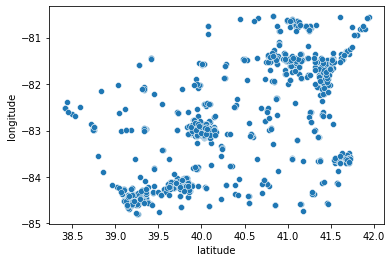

In [ ]:
sns.scatterplot(x = df_ohio['latitude'], y = df_ohio['longitude'])
plt.show

In [ ]:
import plotly.express as px
fig = px.density_mapbox(df_ohio, lat='latitude', lon='longitude', hover_name = 'name', radius=10,
                        center=dict(lat=40.4173, lon=-82.9071), zoom=7,
                        mapbox_style="stamen-terrain")
fig.show()

In [ ]:
import plotly.express as px
fig = px.density_mapbox(df, lat='latitude', lon='longitude', hover_name = 'name', radius=10,
                        center=dict(lat=40.4173, lon=-82.9071), zoom=3,
                        mapbox_style="stamen-terrain")
fig.show()

## Расчет плотности фастфуд ресторанов по городам США

Подключение внешних данных о населении городов США, получение оценки плотности фастфуд ресторанов (количество заведений / 100 тыс. населения)

In [17]:
df_population = pd.read_csv('./uscities.csv')
df_population_cities = df_population['city'].values
df_population_cities = np.sort(df_population_cities)

df_cities = np.unique(df['city'])
df_zips = np.unique(df['postalCode'])

dpop = []

# for i in df_cities:
#         d.append({
#             'city': i,
#             'state_id': df[(df['city'] == i)]['province']
#         })

# fastfood_density = pd.DataFrame()

for i in df_population.index:
    city = df_population['city'][i]
    state = df_population['state_id'][i]
    population = df_population['population'][i]
    dpop.append({
        'city': f'{city}, {state}',
        'population': population
    })

ddf = []

for i in df.index:
    city = df['city'][i]
    state = df['province'][i]
    outlets = df[df['city'] == city]['id'].count()
    ddf.append({
        'city': f'{city}, {state}',
        'outlets': outlets
    })



# for i in cities:
#      np.append(population, df_population[df_population['city'] == i]['population'].values)

In [18]:
df_pop = pd.DataFrame(dpop)
df_pop

,city,population
0,"New York, NY",18680025
1,"Los Angeles, CA",12531334
2,"Chicago, IL",8586888
3,"Miami, FL",6076316
4,"Dallas, TX",5910669
...,...,...
30404,"Drummond, ID",1
30405,"Lost Springs, WY",1
30406,"Provo, SD",1
30407,"Goldcreek, MT",1


In [19]:
df_df = pd.DataFrame(ddf)

In [20]:
merged_df = pd.merge(df_df, df_pop, on = "city")
merged_df = pd.DataFrame(merged_df)
merged_df = merged_df.drop_duplicates(ignore_index = True)

outlets_density = []

for i in merged_df.index:
    outlets_density.append(
        merged_df['outlets'][i] / (merged_df['population'][i] / 100000)
    )

merged_df['outlets_density'] = outlets_density
merged_df

,city,outlets,population,outlets_density
0,"Greeley, CO",5,134417,3.719768
1,"Grand Junction, CO",8,134074,5.966854
2,"Aurora, CO",10,379434,2.635504
3,"Denver, CO",27,2709398,0.996531
4,"Fayetteville, AR",37,350995,10.541461
...,...,...,...,...
3198,"Kaufman, TX",1,7646,13.078734
3199,"Zephyrhills, FL",1,79795,1.253211
3200,"Casselberry, FL",1,28502,3.508526
3201,"Spanish Fort, AL",1,8991,11.122233


<AxesSubplot:xlabel='outlets_density', ylabel='city'>

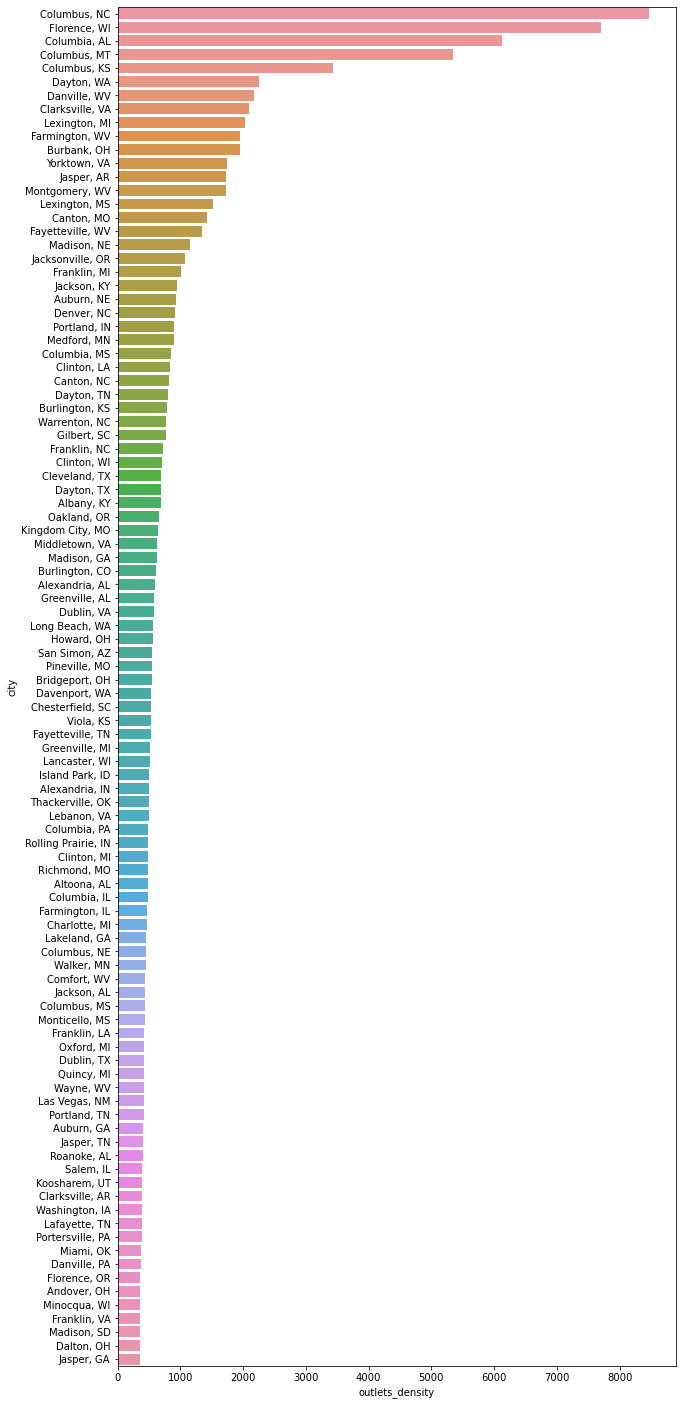

In [37]:
f, ax = plt.subplots(figsize=(10, 25))
sns.barplot(data = merged_df[['city', 'outlets_density']].sort_values('outlets_density', ascending= False).head(100), x = 'outlets_density', y = 'city')

<AxesSubplot:xlabel='outlets_density', ylabel='city'>

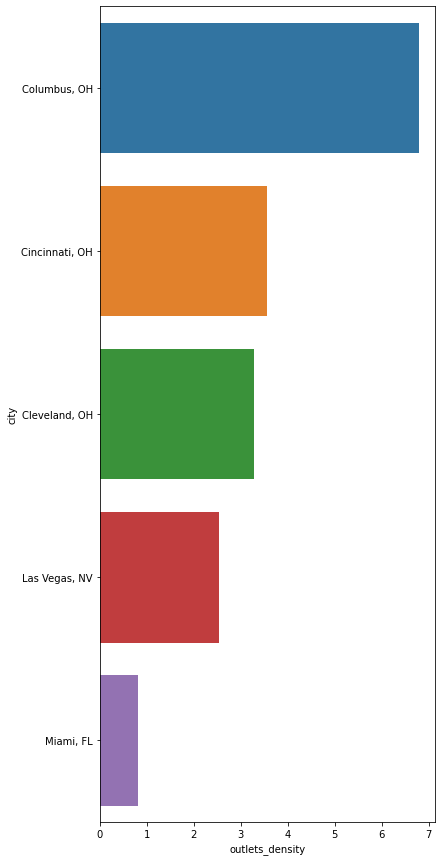

In [44]:
required_cities = merged_df['city'].isin(['Columbus, OH', 'Cincinnati, OH', 'Cleveland, OH', 'Las Vegas, NV', 'Miami, FL'])
req_df = merged_df[required_cities]

f, ax = plt.subplots(figsize = (6,15))
sns.barplot(data = req_df.sort_values('outlets_density', ascending=False), x = 'outlets_density', y = 'city')

## K-mean clustering